In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import mutual_info_classif
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    homogeneity_score, completeness_score, v_measure_score,
    calinski_harabasz_score, silhouette_score
)
from sklearn.neural_network import MLPRegressor
from sklearn.base import BaseEstimator, ClusterMixin
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/data_file.csv.zip")
df

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62480,VirusShare_a43ceb5e5fffc793e0205d15a0606cb0,a43ceb5e5fffc793e0205d15a0606cb0,332,0,0,1,4,0,0,4096,6,0,3,1048576,0,23504,0,0
62481,VirusShare_0190dafc8304111a00fccf57340ea6a4,0190dafc8304111a00fccf57340ea6a4,332,0,0,7,10,0,0,0,7,0,7,1048576,0,15704,0,0
62482,VirusShare_0f3ca55979aaf59158d6b01140696e44,0f3ca55979aaf59158d6b01140696e44,332,0,0,0,4,0,0,404908,2,50,11,1048576,0,2364,0,0
62483,VirusShare_fca5ce35f1690db6babca5aa5d559535,fca5ce35f1690db6babca5aa5d559535,332,0,0,0,4,14448,70,4096,8,0,4,1048576,0,130296,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            62485 non-null  object
 1   md5Hash             62485 non-null  object
 2   Machine             62485 non-null  int64 
 3   DebugSize           62485 non-null  int64 
 4   DebugRVA            62485 non-null  int64 
 5   MajorImageVersion   62485 non-null  int64 
 6   MajorOSVersion      62485 non-null  int64 
 7   ExportRVA           62485 non-null  int64 
 8   ExportSize          62485 non-null  int64 
 9   IatVRA              62485 non-null  int64 
 10  MajorLinkerVersion  62485 non-null  int64 
 11  MinorLinkerVersion  62485 non-null  int64 
 12  NumberOfSections    62485 non-null  int64 
 13  SizeOfStackReserve  62485 non-null  int64 
 14  DllCharacteristics  62485 non-null  int64 
 15  ResourceSize        62485 non-null  int64 
 16  BitcoinAddresses    62

In [ ]:
ransomware_data = df[df['Benign'] == 0]  # Possibly ransomware
benign_data = df[df['Benign'] == 1]   # Legitimate data

In [ ]:
ransomware_data

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
27118,VirusShare_0a09a21c2f28c8c5b5d168feb668a80b,0a09a21c2f28c8c5b5d168feb668a80b,332,0,0,0,4,0,0,8520,6,0,2,1048576,0,0,0,0
27119,VirusShare_bc4ce1d0466f42493418d65b9a1e880f,bc4ce1d0466f42493418d65b9a1e880f,332,0,0,8,10,369716,160,0,9,0,3,0,0,764,0,0
27120,VirusShare_3086d1682a10bca61945ccca93cc8098,3086d1682a10bca61945ccca93cc8098,332,0,0,0,4,0,0,257,2,50,5,1048576,0,227484,0,0
27121,VirusShare_0683b586f3b9ea7a06d4d31555f31f80,0683b586f3b9ea7a06d4d31555f31f80,332,0,0,0,5,0,0,245760,9,0,7,1048576,32768,45920,0,0
27122,VirusShare_d74daee515bd5a77f299151a568cb57a,d74daee515bd5a77f299151a568cb57a,332,28,12336,0,4,0,0,28672,9,0,8,1048576,0,96304,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62480,VirusShare_a43ceb5e5fffc793e0205d15a0606cb0,a43ceb5e5fffc793e0205d15a0606cb0,332,0,0,1,4,0,0,4096,6,0,3,1048576,0,23504,0,0
62481,VirusShare_0190dafc8304111a00fccf57340ea6a4,0190dafc8304111a00fccf57340ea6a4,332,0,0,7,10,0,0,0,7,0,7,1048576,0,15704,0,0
62482,VirusShare_0f3ca55979aaf59158d6b01140696e44,0f3ca55979aaf59158d6b01140696e44,332,0,0,0,4,0,0,404908,2,50,11,1048576,0,2364,0,0
62483,VirusShare_fca5ce35f1690db6babca5aa5d559535,fca5ce35f1690db6babca5aa5d559535,332,0,0,0,4,14448,70,4096,8,0,4,1048576,0,130296,0,0


In [ ]:
benign_data

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27113,vfnws.dll,0cefc438b12ec19affb2ba7aa11df924,34404,84,51424,10,10,52880,52,45328,14,10,6,262144,16736,6656,0,1
27114,vfpodbc.dll,c06f4e78d4f2424067ff3add9a46c4c0,332,28,8224,6,4,8384,201,8192,6,0,5,1048576,0,1480,0,1
27115,vfprint (2).dll,6fda0c8d6292bea520b899050d1a35e7,332,84,37072,10,10,185392,281,200704,14,10,5,262144,17728,103008,0,1
27116,vfprint.dll,5cc10181b9e56e3591890c39508f67a4,34404,84,262960,10,10,280288,284,235008,14,10,6,262144,16736,103008,0,1


In [ ]:
ransomware_undersampled = resample(ransomware_data,
                                   replace=False,    # sample without replacement
                                   n_samples=len(benign_data),  # match number of legitimate rows
                                   random_state=42)  # for reproducibility

In [ ]:
balanced_df = pd.concat([ransomware_undersampled, benign_data])

# Shuffle the data to mix ransomware and legitimate
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
balanced_df

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,VirusShare_a195e5d898b242423c6a846011f1dcaf,a195e5d898b242423c6a846011f1dcaf,332,0,0,1,4,0,0,4096,6,0,3,1048576,0,2052,0,0
1,nvfatbinaryLoader32.dll,dc54e1c84869e6437e44d41727cc485d,332,56,832288,0,6,840496,2651,884736,14,10,7,1048576,320,1737,0,1
2,VirusShare_179b15569ee8c3e0ec9194d4c9dbb21b,179b15569ee8c3e0ec9194d4c9dbb21b,332,0,0,0,5,0,0,196608,9,0,7,1048576,0,2824,0,0
3,VirusShare_8440c5706111ba2130c221d0b9ec88d8,8440c5706111ba2130c221d0b9ec88d8,332,0,0,0,5,0,0,4096,9,0,6,1048576,0,2096,0,0
4,VirusShare_8a0fb72662694e8a8fd008a0828fb1e6,8a0fb72662694e8a8fd008a0828fb1e6,332,0,0,0,4,65536,115,0,5,0,8,1048576,0,262176,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54231,VirusShare_59d0cac75ecec1bf3b268ad7d0cdc34a,59d0cac75ecec1bf3b268ad7d0cdc34a,332,0,0,0,4,0,0,12288,5,12,4,1048576,0,1188,0,0
54232,mssign32 (11).dll,f3e41fec7953227bd5192b51289becd7,34404,28,5232,6,6,48080,1133,4096,9,0,5,262144,320,2176,0,1
54233,TFSSecurity.resources (5).dll,64cc3381edc635da2d413b45460f7155,332,0,0,0,4,0,0,8192,11,0,3,1048576,34112,1184,0,1
54234,VirusShare_9b917db899c9fbcbb0d2e0e7928c3f59,9b917db899c9fbcbb0d2e0e7928c3f59,332,0,0,1,4,0,0,4096,6,0,4,1048576,0,10328,0,0


In [ ]:
# Find rows with any missing values
rows_with_missing = df[df.isnull().any(axis=1)]

# Display rows with missing values
print(rows_with_missing)

Empty DataFrame
Columns: [FileName, md5Hash, Machine, DebugSize, DebugRVA, MajorImageVersion, MajorOSVersion, ExportRVA, ExportSize, IatVRA, MajorLinkerVersion, MinorLinkerVersion, NumberOfSections, SizeOfStackReserve, DllCharacteristics, ResourceSize, BitcoinAddresses, Benign]
Index: []


In [ ]:
numeric_features = balanced_df.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
def categorize_attributes(df, threshold_skewness=0.5):
    # Dictionary to store attribute categories
    attribute_groups = {
        'normalization': [],
        'standardization': [],
        'power_transformation': []
    }

    # Loop over numerical columns to assess skewness
    for col in df.select_dtypes(include=[np.number]).columns:
        skewness = df[col].skew()

        # Group columns based on skewness
        if abs(skewness) < threshold_skewness:
            attribute_groups['standardization'].append(col)
        elif skewness > threshold_skewness or skewness < -threshold_skewness:
            attribute_groups['power_transformation'].append(col)
        else:
            attribute_groups['normalization'].append(col)

    return attribute_groups

In [ ]:
groups = categorize_attributes(balanced_df)

# Output grouped attributes
print("Standardization group:", groups['standardization'])
print("Power Transformation group:", groups['power_transformation'])
print("Normalization group:", groups['normalization'])

groups['standardization'].pop()

Standardization group: ['Benign']
Power Transformation group: ['Machine', 'DebugSize', 'DebugRVA', 'MajorImageVersion', 'MajorOSVersion', 'ExportRVA', 'ExportSize', 'IatVRA', 'MajorLinkerVersion', 'MinorLinkerVersion', 'NumberOfSections', 'SizeOfStackReserve', 'DllCharacteristics', 'ResourceSize', 'BitcoinAddresses']
Normalization group: []


'Benign'

In [ ]:


# Drop non-numeric columns
features = df.drop(columns=['FileName', 'md5Hash', 'Benign'])

# Group features (example logic: standardize all, power-transform only selected ones)
groups = {
    'standardization': features.columns.tolist(),  # All features
    'power_transformation': ['DebugSize', 'ExportSize', 'ResourceSize']  # Example subset
}

# Initialize scalers
scaler = StandardScaler()
normalizer = MinMaxScaler()
power_transformer = PowerTransformer(method='yeo-johnson')

# Copy the dataset
transformed_df = df.copy()

# Apply standardization
transformed_df[groups['standardization']] = scaler.fit_transform(features[groups['standardization']])

# Apply power transformation (on already standardized or raw subset)
transformed_df[groups['power_transformation']] = power_transformer.fit_transform(
    features[groups['power_transformation']]
)


In [ ]:
transformed_df.head()

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,-0.481400,-0.838859,-0.081004,-0.052767,-0.557274,-0.023689,-0.695400,-0.123099,-0.197036,-0.389552,-0.818853,0.274474,1.341528,-0.583487,-0.135405,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,2.071691,1.347902,-0.017042,-0.043791,1.801516,-0.020340,1.648108,-0.130383,0.466161,0.199503,1.519161,-0.976186,0.247292,-0.454742,-0.135405,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,-0.481400,-0.838859,-0.081004,-0.052767,-0.557274,-0.023689,-0.695400,-0.123099,-0.197036,-0.389552,-0.818853,0.274474,1.341528,-0.583487,-0.135405,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,2.071691,1.347902,-0.070546,-0.043791,1.801516,-0.023125,1.451119,-0.114235,0.466161,0.199503,0.583955,-0.976186,0.239172,-0.449929,-0.135405,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,2.071691,1.347902,-0.029653,-0.043791,1.801516,-0.020890,1.605941,-0.067613,0.466161,0.199503,1.051558,-0.976186,0.239172,-0.433606,-0.135405,1


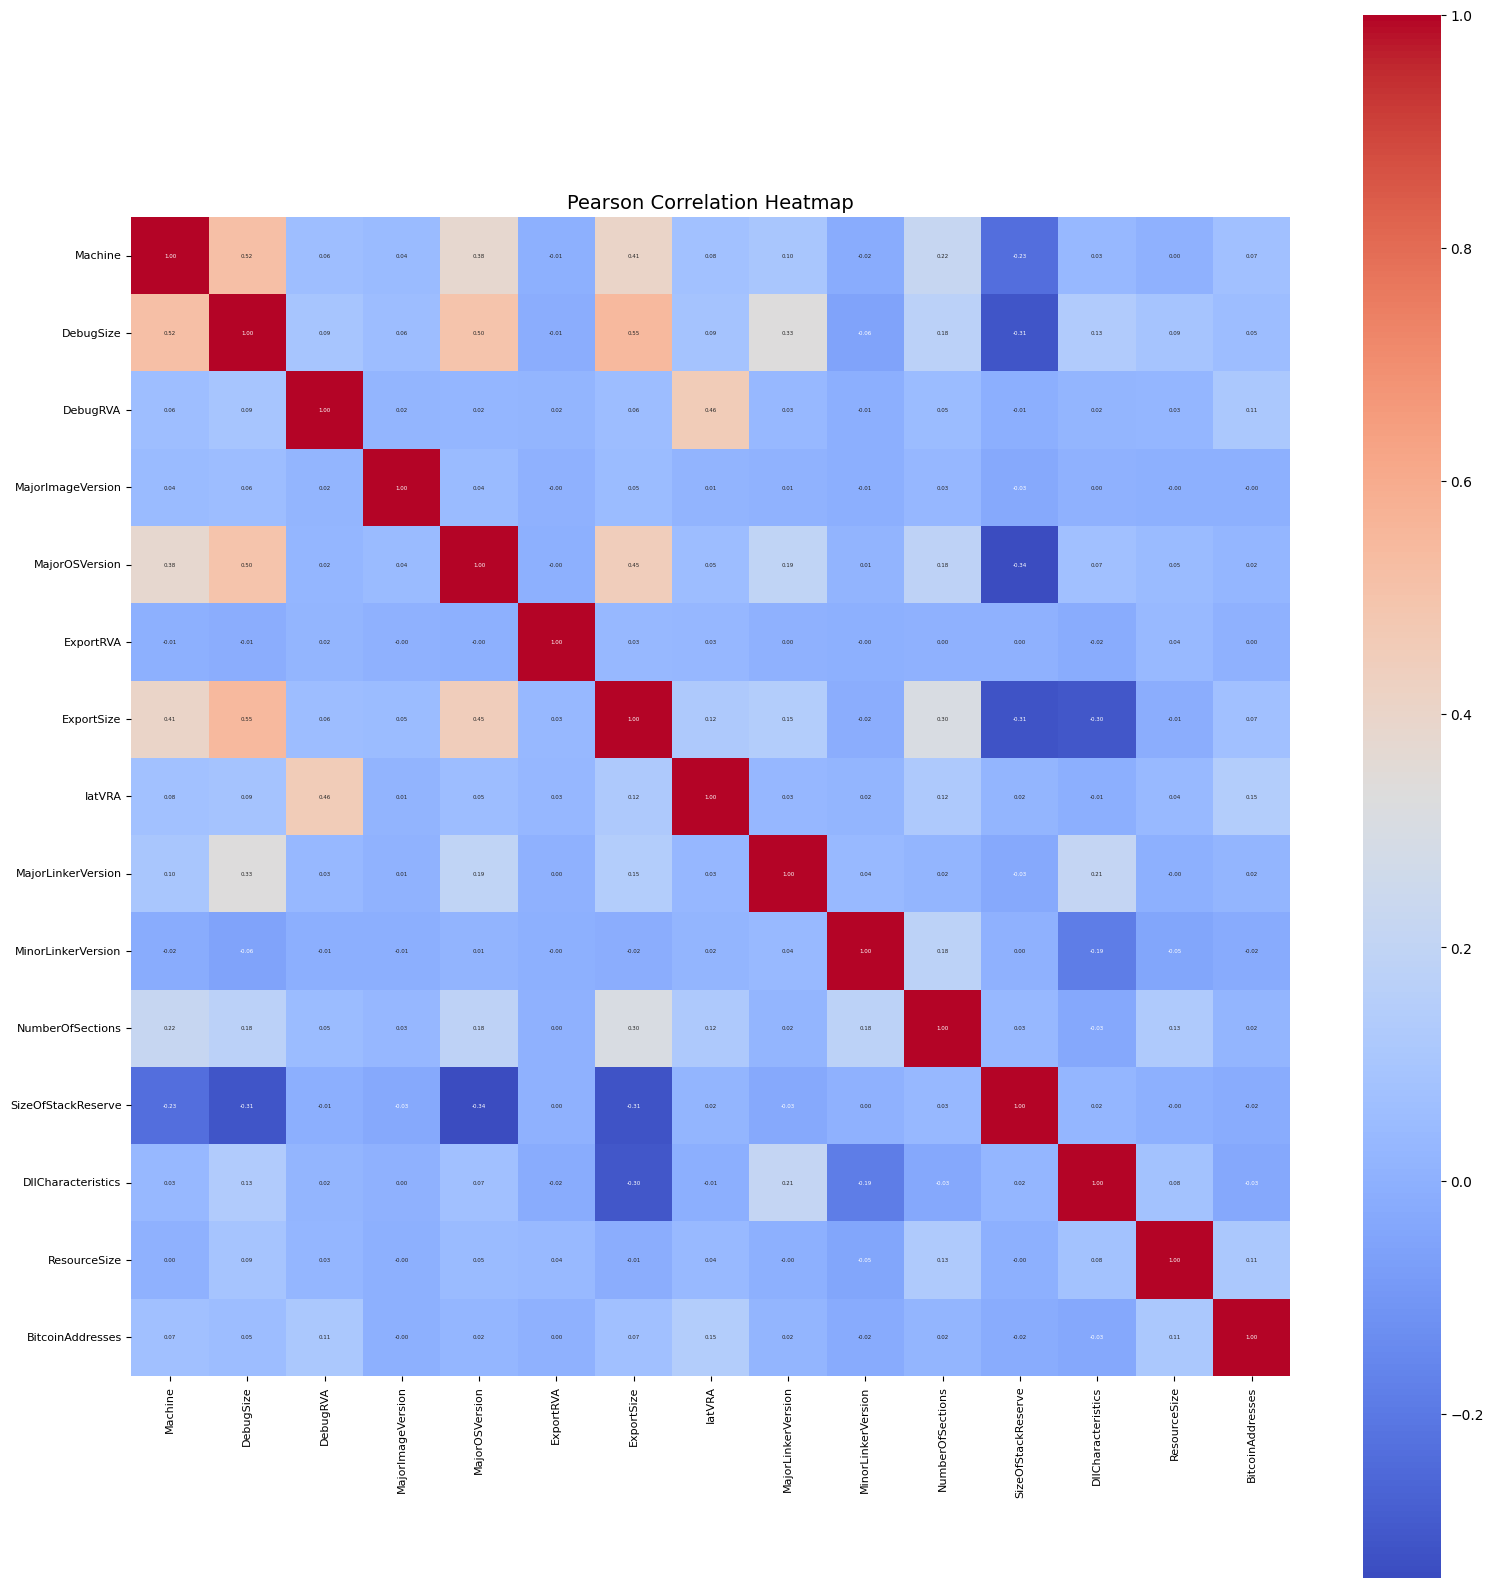

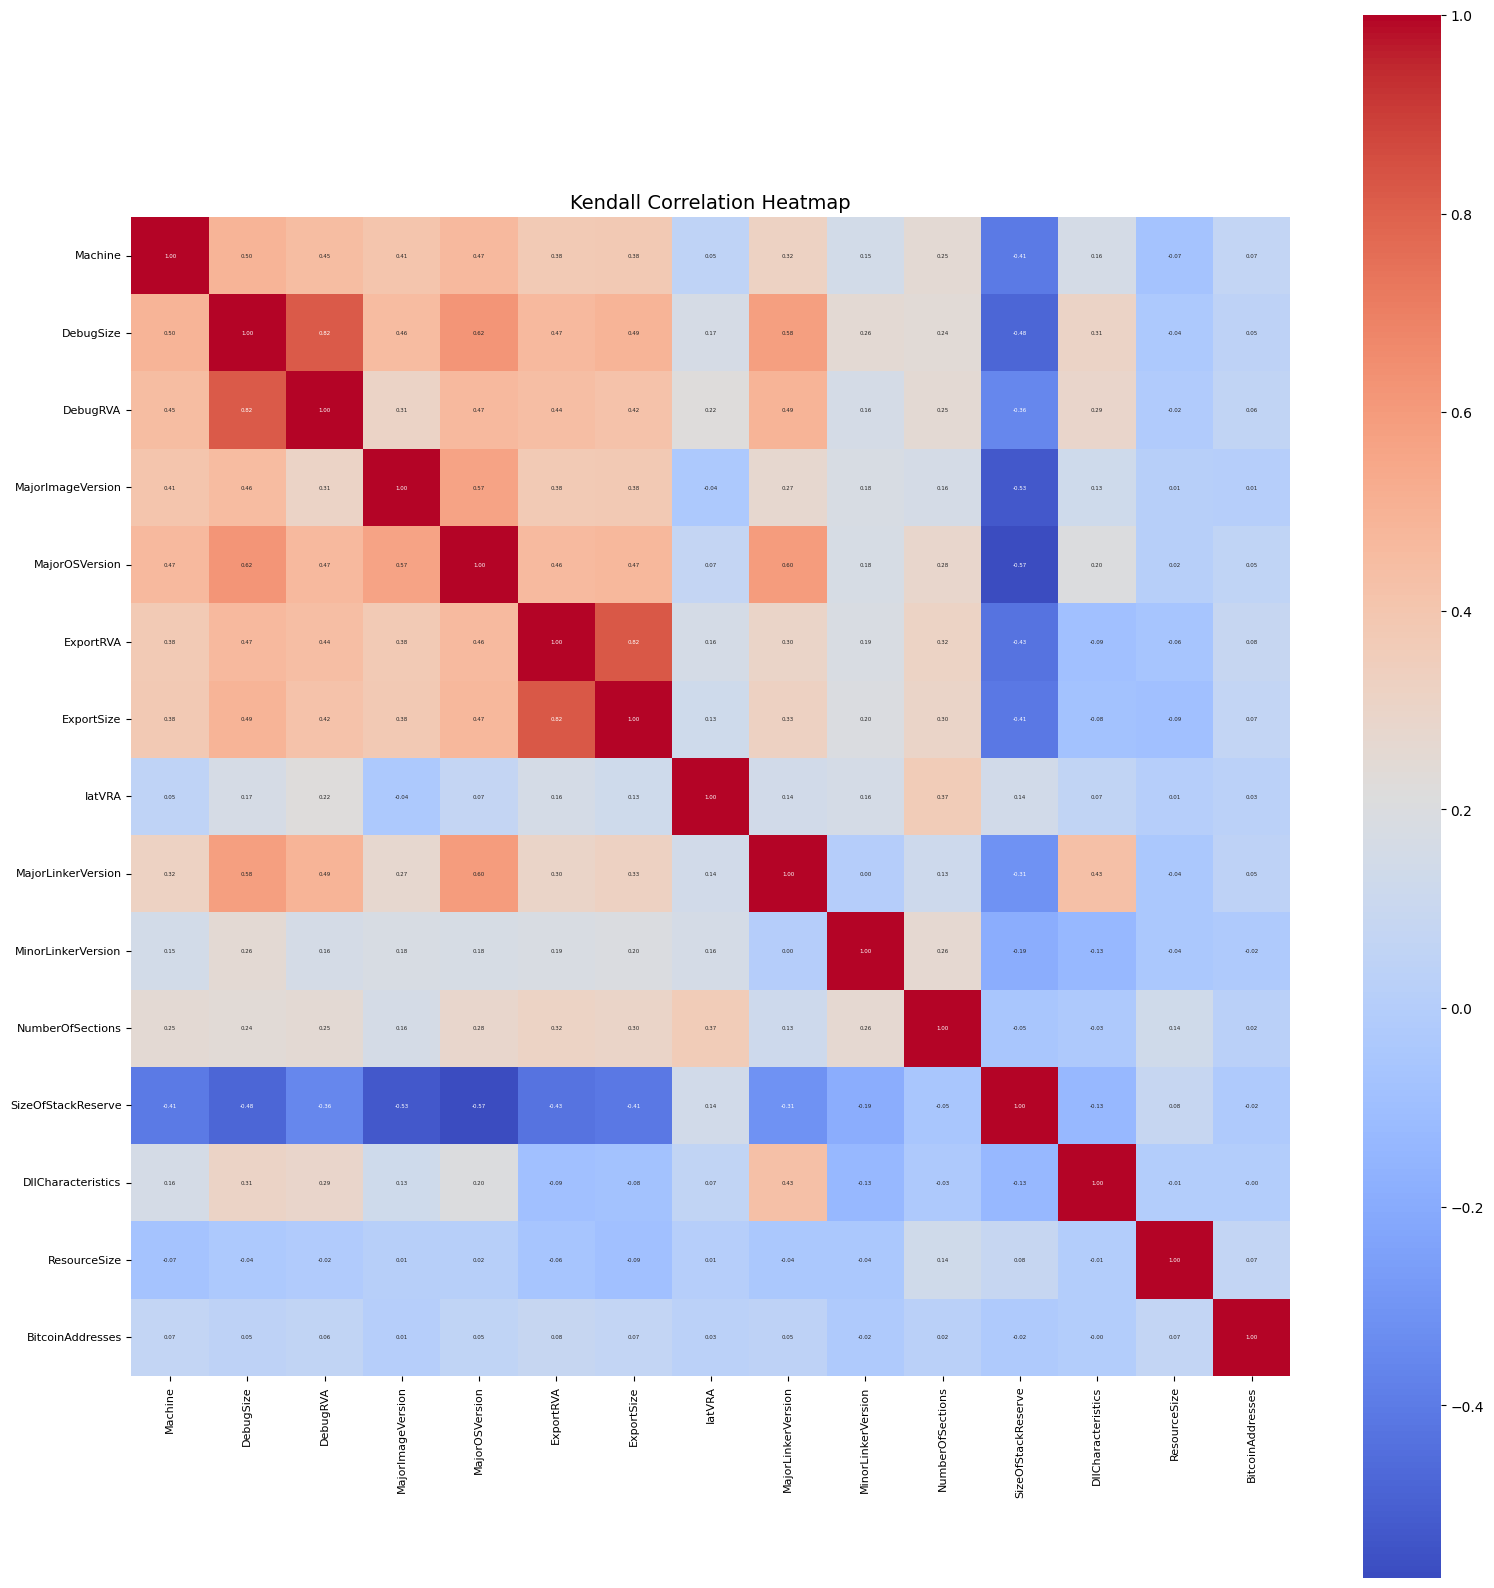

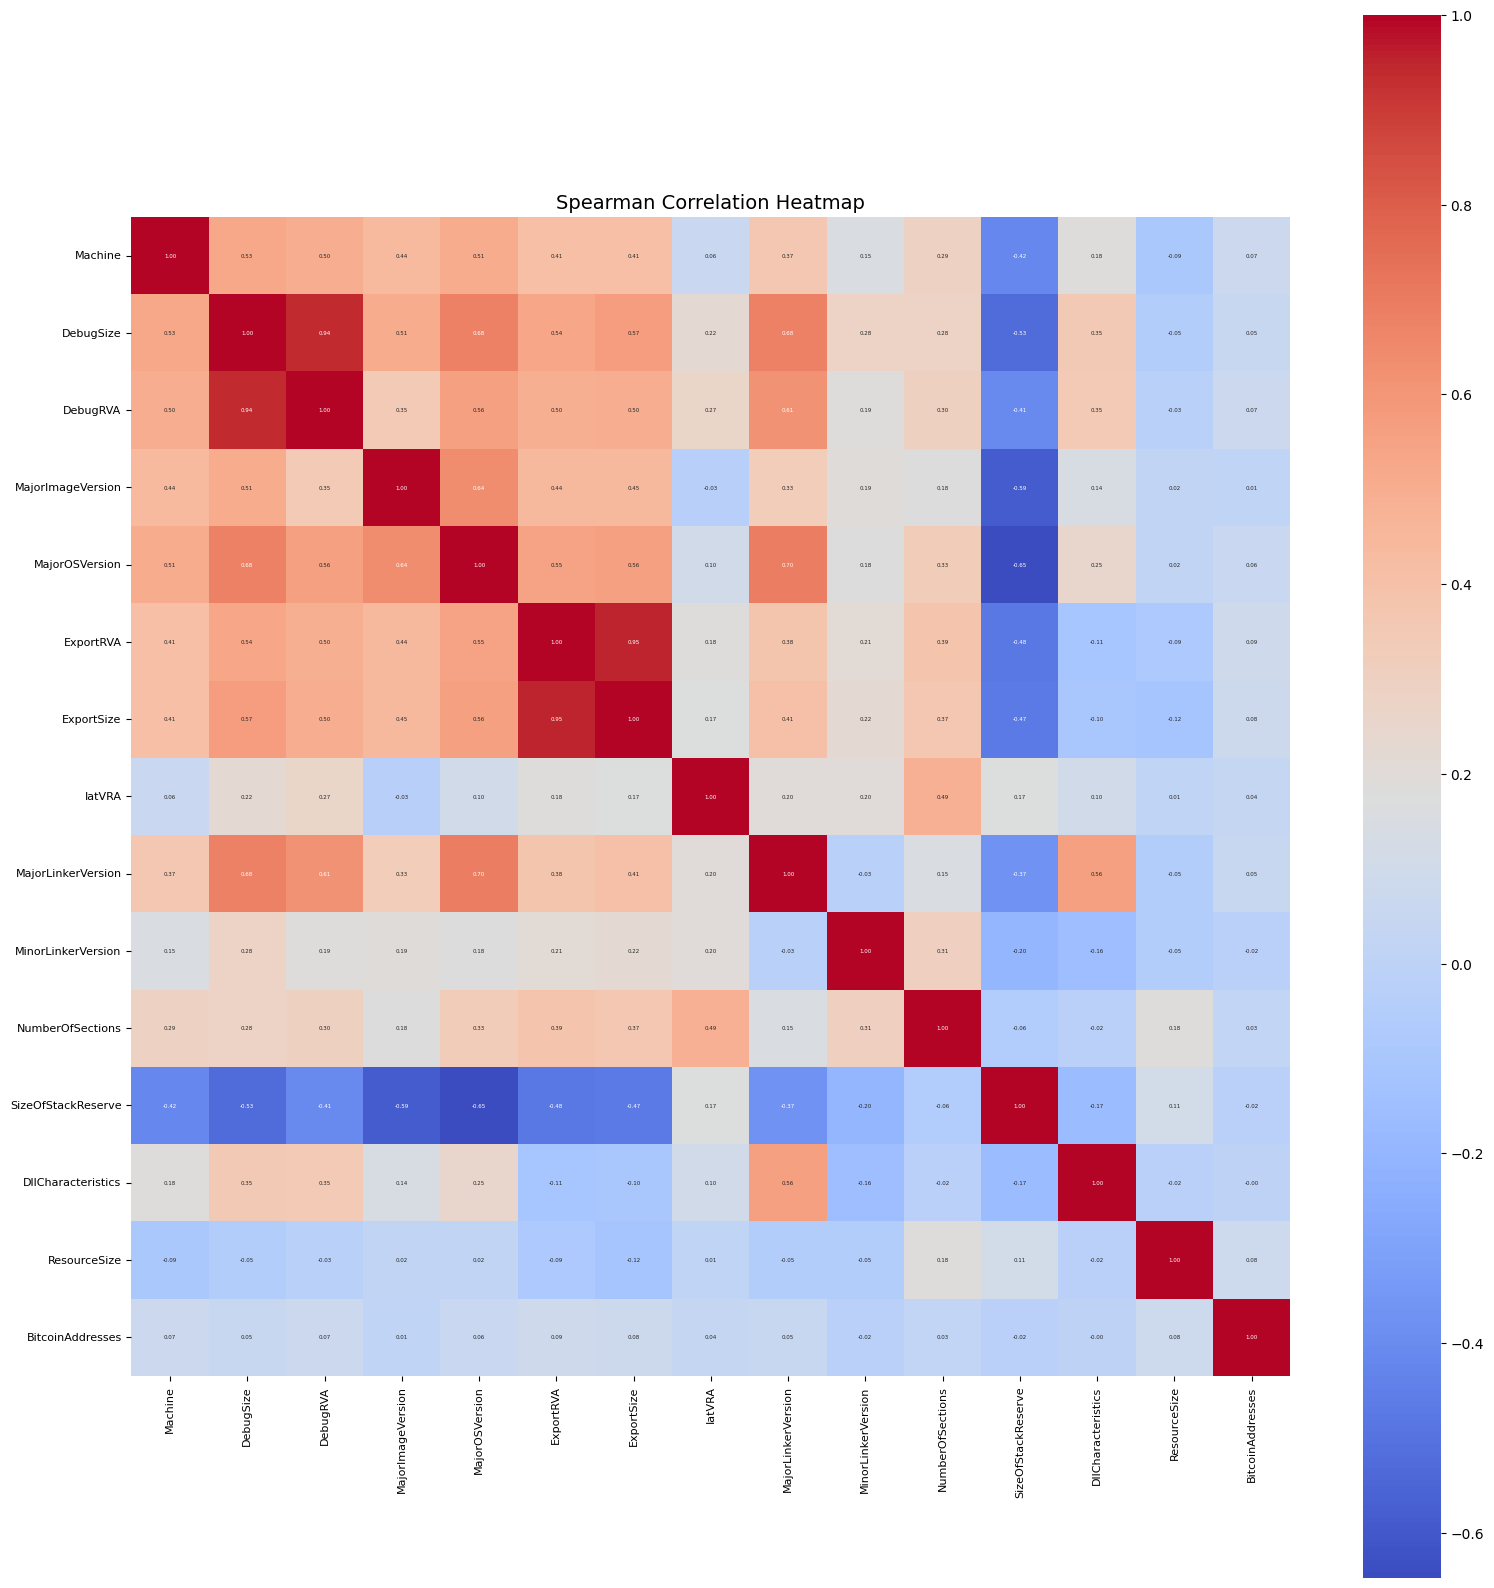

In [ ]:
# Dropping non-numerical columns and 'Name' for correlation analysis
df_numeric = transformed_df.drop(columns=['FileName', 'md5Hash', 'Benign'])

# Calculate correlation matrices for Pearson, Kendall, and Spearman
pearson_corr = df_numeric.corr(method='pearson')
kendall_corr = df_numeric.corr(method='kendall')
spearman_corr = df_numeric.corr(method='spearman')

# Plot heatmaps for each correlation matrix
def plot_heatmap(corr_matrix, title):
    plt.figure(figsize=(16, 16))  # Increase the figure size
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                annot_kws={"size": 4}, cbar=True, square=True,
                xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)

    plt.xticks(rotation=90, fontsize=8)  # Rotate X-axis labels for better readability
    plt.yticks(fontsize=8)  # Set font size for Y-axis labels
    plt.title(f'{title} Correlation Heatmap', fontsize=14)
    plt.tight_layout()  # Ensure layout fits well
    plt.show()

# Plotting heatmaps
plot_heatmap(pearson_corr, 'Pearson')
plot_heatmap(kendall_corr, 'Kendall')
plot_heatmap(spearman_corr, 'Spearman')

In [ ]:
import pandas as pd
import numpy as np

# Select only numeric features (excluding labels and IDs)
numeric_df = df.drop(columns=['FileName', 'md5Hash', 'Benign'])

# Compute correlation matrices
pearson_corr = numeric_df.corr(method='pearson')
kendall_corr = numeric_df.corr(method='kendall')
spearman_corr = numeric_df.corr(method='spearman')

# Function to get high correlation pairs
def get_high_corr_pairs(corr_matrix, threshold):
    mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    high_corr = corr_matrix.where(mask).stack().reset_index()
    high_corr.columns = ['Feature1', 'Feature2', 'Correlation']
    return high_corr[high_corr['Correlation'].abs() >= threshold]

# Get highly correlated pairs
pearson_high_corr = get_high_corr_pairs(pearson_corr, threshold=0.3)
kendall_high_corr = get_high_corr_pairs(kendall_corr, threshold=0.3)
spearman_high_corr = get_high_corr_pairs(spearman_corr, threshold=0.3)

# Convert to sets of sorted tuples
pearson_pairs = set(tuple(sorted([row['Feature1'], row['Feature2']])) for _, row in pearson_high_corr.iterrows())
kendall_pairs = set(tuple(sorted([row['Feature1'], row['Feature2']])) for _, row in kendall_high_corr.iterrows())
spearman_pairs = set(tuple(sorted([row['Feature1'], row['Feature2']])) for _, row in spearman_high_corr.iterrows())

# Find common highly correlated pairs across all correlation methods
common_pairs_first = pearson_pairs & kendall_pairs & spearman_pairs

common_pairs_first


{('Machine', 'MajorOSVersion'), ('MajorOSVersion', 'SizeOfStackReserve')}

In [ ]:
def compare_variances(df, pairs):
    for pair in pairs:
        var1 = df[pair[0]].var()
        var2 = df[pair[1]].var()
        print(f"Variance of {pair[0]}: {var1}")
        print(f"Variance of {pair[1]}: {var2}")
        if var1 > var2:
            print(f"{pair[1]} has lower variance than {pair[0]}\n")
        elif var1 < var2:
            print(f"{pair[0]} has lower variance than {pair[1]}\n")
        else:
            print(f"{pair[0]} and {pair[1]} have the same variance\n")

# Call the function to compare variances for the given pairs
compare_variances(transformed_df, common_pairs_first)

Variance of Machine: 1.000016004094933
Variance of MajorOSVersion: 1.000016004097008
Machine has lower variance than MajorOSVersion

Variance of MajorOSVersion: 1.000016004097008
Variance of SizeOfStackReserve: 1.0000160040981279
MajorOSVersion has lower variance than SizeOfStackReserve



In [ ]:


# Copy the original DataFrame
mi_df = df.copy()

# Drop non-numeric or irrelevant columns
mi_df = mi_df.drop(columns=['FileName', 'md5Hash'])

# Compute mutual information scores
X = mi_df.drop('Benign', axis=1)
y = mi_df['Benign']

mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns)

# Create DataFrame for better viewing
mi_result_df = pd.DataFrame({'Mutual Information': mi_scores})
mi_result_df.sort_values(by='Mutual Information', ascending=False, inplace=True)

mi_result_df


,Mutual Information
DllCharacteristics,0.515806
ResourceSize,0.419275
MajorLinkerVersion,0.355191
DebugRVA,0.349292
DebugSize,0.278965
MajorOSVersion,0.272610
SizeOfStackReserve,0.226133
Machine,0.189031
IatVRA,0.183215
ExportSize,0.172530


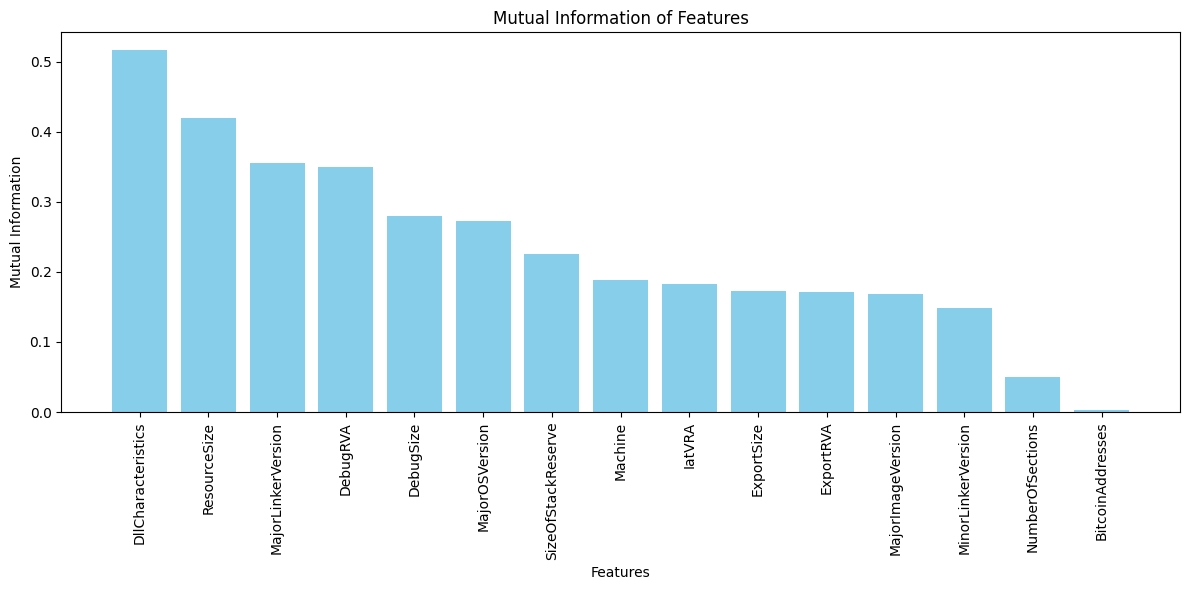

In [ ]:


# Sort mutual information results
sorted_mi = mi_result_df.sort_values(by='Mutual Information', ascending=False)

# Plot the MI values as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_mi.index, sorted_mi['Mutual Information'], color='skyblue')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.title("Mutual Information of Features")
plt.xlabel("Features")
plt.ylabel("Mutual Information")

# Adjust layout and show
plt.tight_layout()
plt.show()


In [ ]:
low_mi_attributes = mi_result_df[mi_result_df['Mutual Information'] < 0.25].index.tolist()
low_mi_attributes

['SizeOfStackReserve',
 'Machine',
 'IatVRA',
 'ExportSize',
 'ExportRVA',
 'MajorImageVersion',
 'MinorLinkerVersion',
 'NumberOfSections',
 'BitcoinAddresses']

In [ ]:
low_mi_attributes = mi_result_df[mi_result_df['Mutual Information'] < 0.1].index.tolist()
low_mi_attributes

['NumberOfSections', 'BitcoinAddresses']

In [ ]:
low_mi_attributes = mi_result_df[mi_result_df['Mutual Information'] < 0.01].index.tolist()
low_mi_attributes

['BitcoinAddresses']

In [ ]:
# Select features with Mutual Information > 0.25
required_columns = mi_result_df[mi_result_df['Mutual Information'] > 0.25].index.tolist()

# Create a reduced feature DataFrame
feature_reduced_df = transformed_df[required_columns].copy()

# Add the target column back
feature_reduced_df['Benign'] = transformed_df['Benign']

# Display structure of the new DataFrame
feature_reduced_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DllCharacteristics  62485 non-null  float64
 1   ResourceSize        62485 non-null  float64
 2   MajorLinkerVersion  62485 non-null  float64
 3   DebugRVA            62485 non-null  float64
 4   DebugSize           62485 non-null  float64
 5   MajorOSVersion      62485 non-null  float64
 6   Benign              62485 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 3.3 MB


In [ ]:
X = feature_reduced_df.drop(columns=['Benign'],axis=1)
y = feature_reduced_df['Benign']

#Array to store the evaluation result of each of these models
results_dict = {}

In [ ]:
#visualise clusters
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

# Function to visualize clusters
def visualize_clusters(model_name, labels, X_reduced, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(f'Clusters for {model_name}')
    plt.colorbar()
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
#evaluate cluster methods
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

def evaluate_clustering(model_name, labels, X, y):
    silhouette_avg = silhouette_score(X, labels)
    ch_score = calinski_harabasz_score(X, labels)
    homogeneity = homogeneity_score(y, labels)
    completeness = completeness_score(y, labels)
    v_measure = v_measure_score(y, labels)
    # Store the metrics in a nested dictionary
    return {
        'Silhouette Score': silhouette_avg,
        'Calinski-Harabasz Score': ch_score,
        'Homogeneity': homogeneity,
        'Completeness': completeness,
        'V-Measure': v_measure
    }

**K-MEANS**

   Predicted Cluster  Actual Label
0                  1             1
1                  0             1
2                  1             1
3                  0             1
4                  0             1


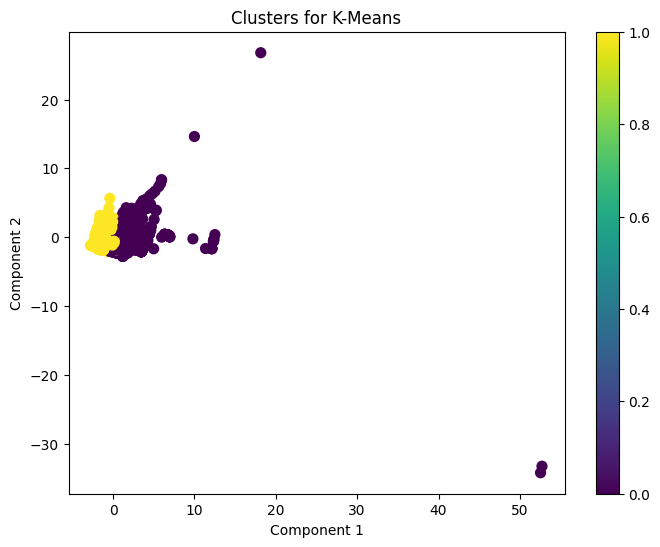

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Predict the clusters
clusters = kmeans.labels_

# Compare clustering results to actual labels
cluster_df = pd.DataFrame({'Predicted Cluster': clusters, 'Actual Label': y})
print(cluster_df.head())

# Evaluating K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
results_dict["K-Means"] = evaluate_clustering("K-Means", kmeans.labels_, X, y)

# Visualizing K-Means Clustering
kmeans_labels = kmeans.labels_
visualize_clusters("K-Means", kmeans_labels, X_pca, y)

**DBSCAN**

   Predicted Cluster  Actual Label
0                  0             1
1                  1             1
2                  0             1
3                  1             1
4                  1             1


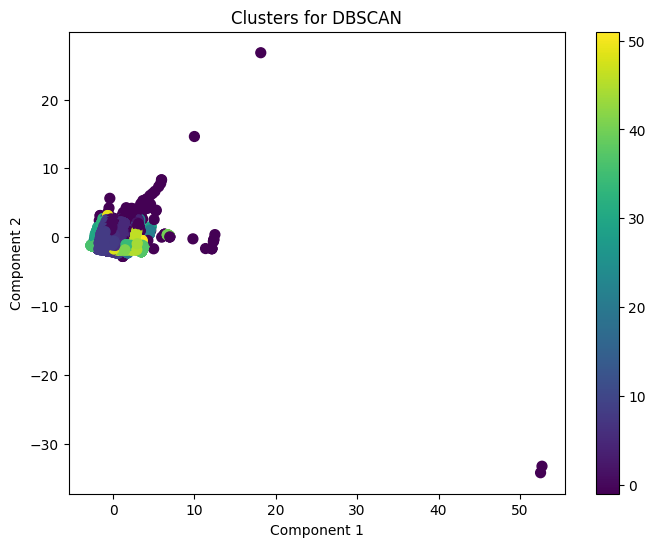

In [ ]:
from sklearn.cluster import DBSCAN

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

# Predict the clusters
db_clusters = dbscan.labels_

# Compare DBSCAN clusters to actual labels
dbscan_cluster_df = pd.DataFrame({'Predicted Cluster': db_clusters, 'Actual Label': y})
print(dbscan_cluster_df.head())

# Evaluating DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_clusters = dbscan.fit_predict(X)
results_dict["DBSCAN"] = evaluate_clustering("DBSCAN", db_clusters, X, y)

# Visualizing DBSCAN Clustering
visualize_clusters("DBSCAN", db_clusters, X_pca, y)

**Gaussian Mixture Model**

   Predicted Cluster  Actual Label
0                  1             1
1                  0             1
2                  1             1
3                  0             1
4                  0             1


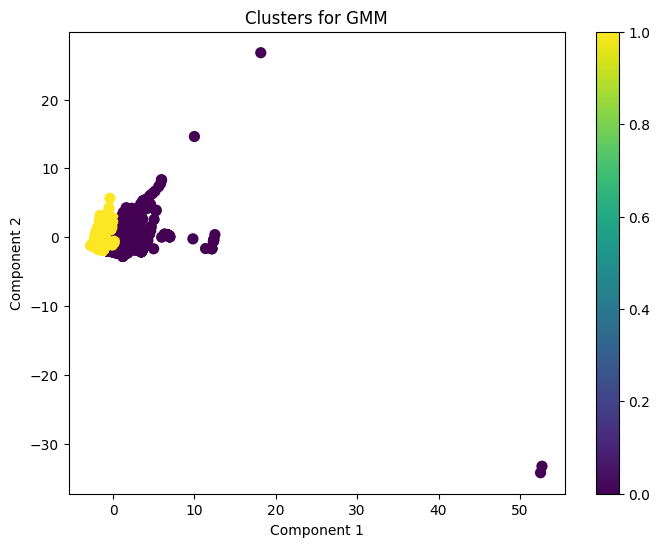

In [ ]:
from sklearn.mixture import GaussianMixture

# GMM Clustering
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X)

# Predict clusters
gmm_clusters = gmm.predict(X)

# Compare GMM clusters to actual labels
gmm_cluster_df = pd.DataFrame({'Predicted Cluster': gmm_clusters, 'Actual Label': y})
print(gmm_cluster_df.head())

# Evaluating Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X)
gmm_clusters = gmm.predict(X)
results_dict["GMM"] = evaluate_clustering("GMM", gmm_clusters, X, y)

# Visualizing GMM Clustering
visualize_clusters("GMM", gmm_clusters, X_pca, y)

### *** Hierarchical Clustering***

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


   Predicted Cluster  Actual Label
0                361             1
1                 -1             1
2                361             1
3               1452             1
4                 -1             1


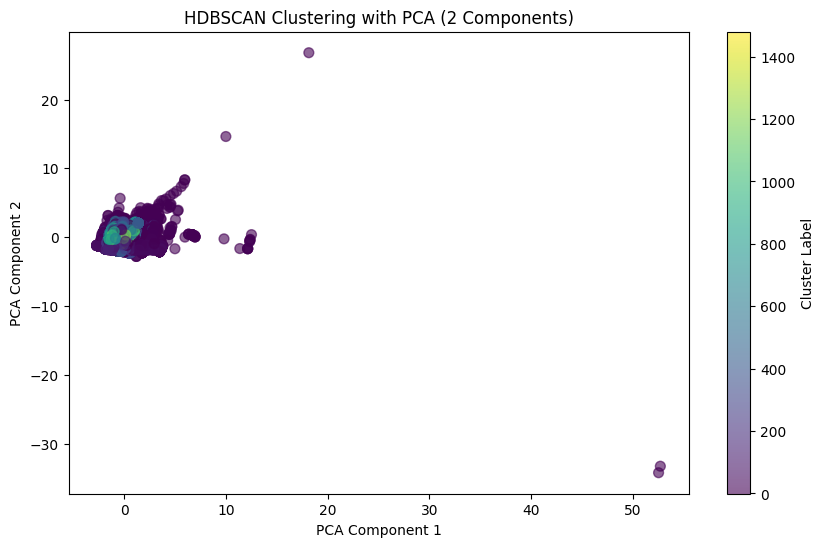

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import hdbscan
import pandas as pd
import matplotlib.pyplot as plt

# Extract features and labels
X = feature_reduced_df.drop(columns=['Benign'])
y = feature_reduced_df['Benign']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X)

# HDBSCAN Clustering
hdbscan_clustering = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5)  # Adjust parameters as needed
hdbscan_clusters = hdbscan_clustering.fit_predict(X)

# Compare HDBSCAN clusters to actual labels
hdbscan_cluster_df = pd.DataFrame({'Predicted Cluster': hdbscan_clusters, 'Actual Label': y})
print(hdbscan_cluster_df.head())

# Evaluating HDBSCAN Clustering
results_dict["HDBSCAN Clustering"] = evaluate_clustering("HDBSCAN Clustering", hdbscan_clusters, X, y)

# Visualizing PCA-reduced data with HDBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hdbscan_clusters, cmap='viridis', s=50, alpha=0.6)
plt.colorbar(label='Cluster Label')
plt.title('HDBSCAN Clustering with PCA (2 Components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

Epoch 1/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.1652
Epoch 2/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8137
Epoch 3/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6385
Epoch 4/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5976
Epoch 5/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8796
Epoch 6/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7942
Epoch 7/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5139
Epoch 8/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5326
Epoch 9/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5816
Epoch 10/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5819
Epoch 11/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5688
Epoch 12/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5881
Epoch 13/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6817
Epoch 14/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5370
Epoch 15/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

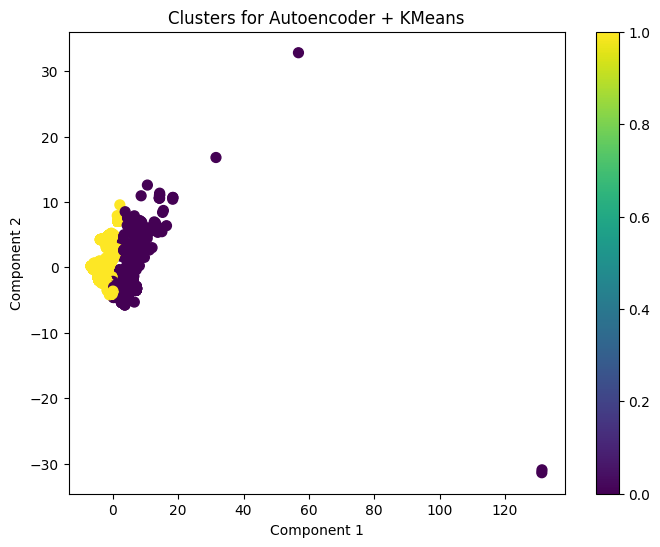

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.cluster import KMeans

# Build Autoencoder
input_dim = X.shape[1]
encoding_dim = 10  # Number of dimensions to reduce to

# Encoder
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X, X, epochs=50, batch_size=256, shuffle=True)

# Get the encoded (dimensionality-reduced) data
encoder = models.Model(input_layer, encoded)
X_encoded = encoder.predict(X)

# Now, you can use X_encoded to apply a clustering algorithm or directly use it for classification
print(X_encoded.shape)



# Evaluating Autoencoder (for dimensionality reduction, then use KMeans for clustering)
# Build Autoencoder
input_dim = X.shape[1]
encoding_dim = 10  # Number of dimensions to reduce to

# Encoder
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X, X, epochs=50, batch_size=256, shuffle=True)

# Get the encoded (dimensionality-reduced) data
encoder = models.Model(input_layer, encoded)
X_encoded = encoder.predict(X)

# Apply K-Means to the encoded data
kmeans_encoded = KMeans(n_clusters=2, random_state=42)
kmeans_encoded.fit(X_encoded)
evaluate_clustering("Autoencoder + KMeans", kmeans_encoded.labels_, X_encoded, y)
results_dict["Autoencoder + K Means"] = evaluate_clustering("Autoencoder + KMeans", kmeans_encoded.labels_, X_encoded, y)

# Visualizing Autoencoder + KMeans
# Apply PCA on encoded data
X_encoded_pca = pca.fit_transform(X_encoded)
kmeans_encoded_labels = kmeans_encoded.labels_
visualize_clusters("Autoencoder + KMeans", kmeans_encoded_labels, X_encoded_pca, y)

**VISUALISING AND COMPARING PERFORMANCE**

<ipython-input-33-8c93f0f01d83>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df.reset_index(), x='index', y=metrics[0], ax=axes[0, 0], palette=palette_1, width=0.4)
<ipython-input-33-8c93f0f01d83>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df.reset_index(), x='index', y=metrics[1], ax=axes[0, 1], palette=palette_2, width=0.4)
<ipython-input-33-8c93f0f01d83>:38: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(data=melted_df, x='index', y='Score', hue='Metric', ax=axes[1, 0], palette=palette_3)


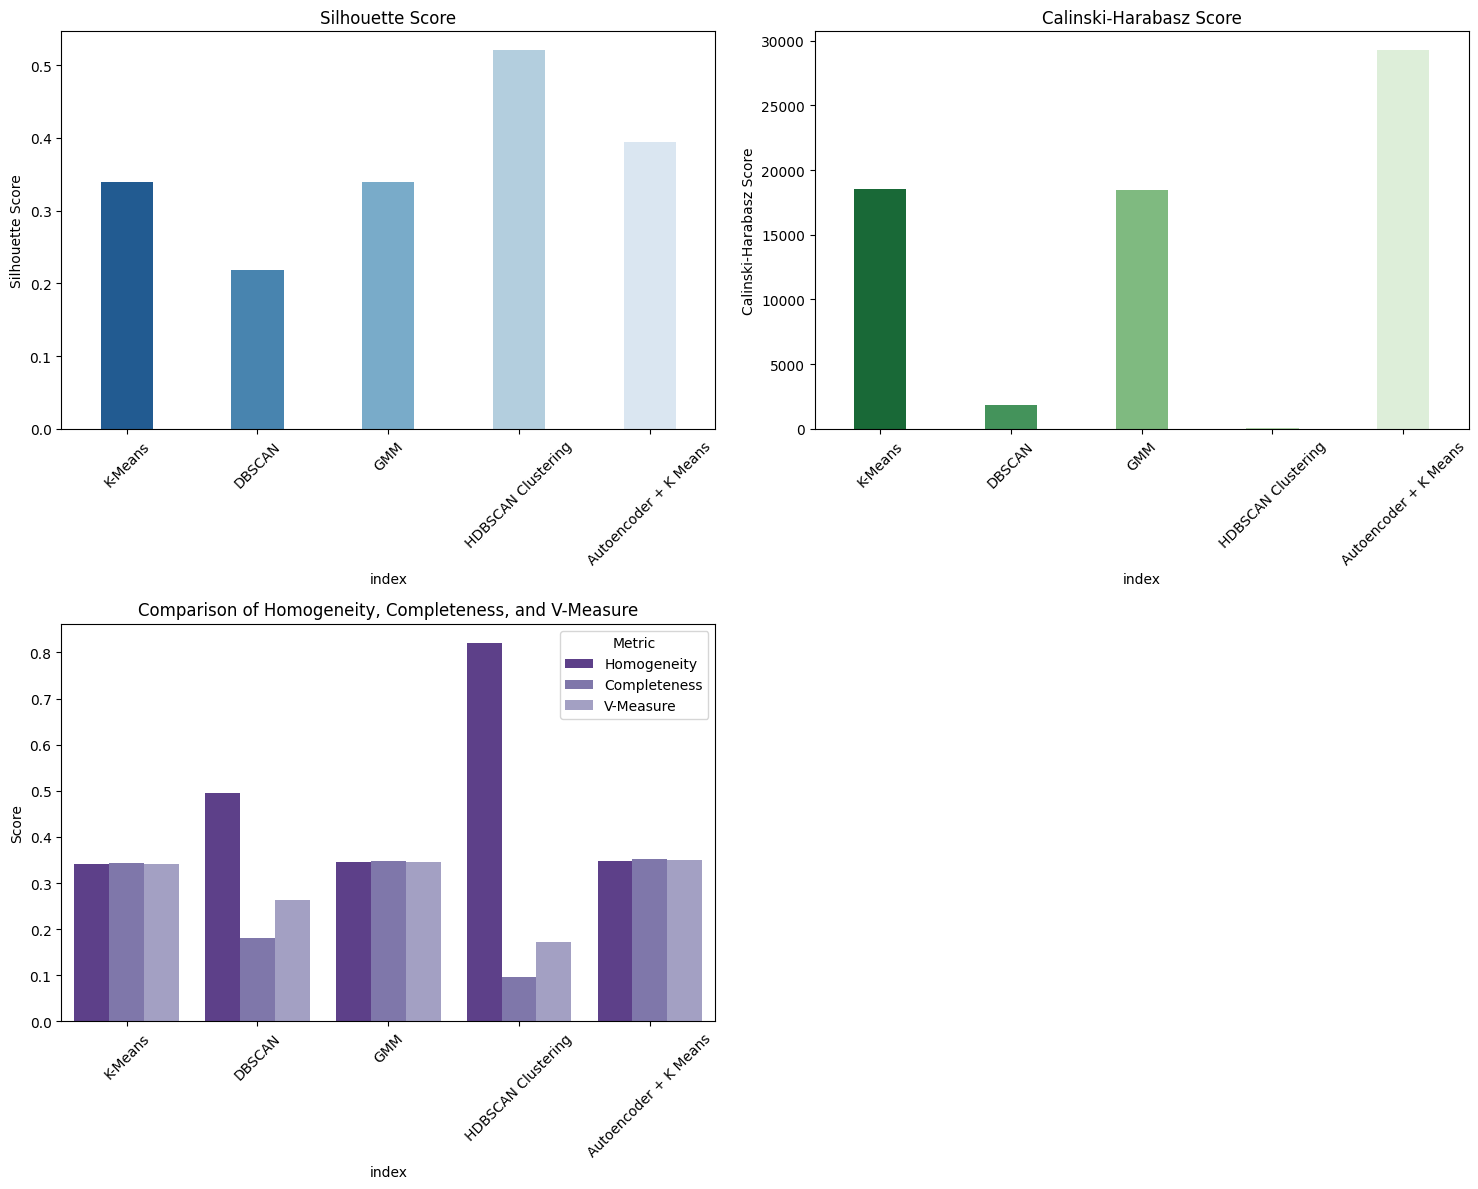

,Silhouette Score,Calinski-Harabasz Score,Homogeneity,Completeness,V-Measure
K-Means,0.339651,18572.046407,0.340457,0.343124,0.341785
DBSCAN,0.217963,1884.012689,0.496214,0.180064,0.264242
GMM,0.338791,18475.555797,0.345076,0.346928,0.345999
HDBSCAN Clustering,0.520621,91.061416,0.820997,0.095920,0.171772
Autoencoder + K Means,0.394612,29260.710938,0.348522,0.351271,0.349891


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
display_metrics = ['Homogeneity', 'Completeness', 'V-Measure']

# Convert results_dict to a DataFrame for easy plotting
results_df = pd.DataFrame.from_dict(results_dict, orient='index')

# Print the table of all metrics including Silhouette Score and Calinski-Harabasz Score
display_table = results_df[['Silhouette Score', 'Calinski-Harabasz Score'] + display_metrics]
# print(display_table)  # Display the table in console to verify

# Plot the other metrics (Silhouette Score, Calinski-Harabasz Score) + the new bar plot for Homogeneity, Completeness, and V-Measure
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # Adjust the figure to have 2 rows and 2 columns

# Different color palettes for each plot
palette_1 = sns.color_palette("Blues_r", len(results_df))
palette_2 = sns.color_palette("Greens_r", len(results_df))
palette_3 = sns.color_palette("Purples_r", len(results_df))  # Palette for the new metrics plot

# Metrics to plot
metrics = ['Silhouette Score', 'Calinski-Harabasz Score']

# First plot for Silhouette Score with reduced bar width
sns.barplot(data=results_df.reset_index(), x='index', y=metrics[0], ax=axes[0, 0], palette=palette_1, width=0.4)
axes[0, 0].set_title(metrics[0], fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

# Second plot for Calinski-Harabasz Score with reduced bar width
sns.barplot(data=results_df.reset_index(), x='index', y=metrics[1], ax=axes[0, 1], palette=palette_2, width=0.4)
axes[0, 1].set_title(metrics[1], fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)

# Create a melted version of the DataFrame for Homogeneity, Completeness, and V-Measure
melted_df = results_df.reset_index().melt(id_vars='index', value_vars=display_metrics, var_name='Metric', value_name='Score')

# Plot the Homogeneity, Completeness, and V-Measure metrics in the third plot
sns.barplot(data=melted_df, x='index', y='Score', hue='Metric', ax=axes[1, 0], palette=palette_3)
axes[1, 0].set_title('Comparison of Homogeneity, Completeness, and V-Measure', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# Hide the unused subplot (axes[1, 1]) since we only need three plots
axes[1, 1].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# display the table inline in a Jupyter environment
from IPython.display import display
display(display_table)